<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/03-KNeighbors-Classifier/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Miguel Ángel Hernández Tapia

# IMPORTING LIBRARIES
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data

In [2]:
# TWO GROUPS OF DATA OF ORDERED NUMBER PAIRS ARE CREATED, 3 CLASSES, ONE OF 200 AND ANOTHER OF 10

training_data, labels = make_blobs(n_samples = 100, centers = 2, cluster_std = 2.5, random_state = 9)
test_data, labels_test = make_blobs(n_samples = 10, centers = 2, cluster_std = 2.5, random_state = 9)


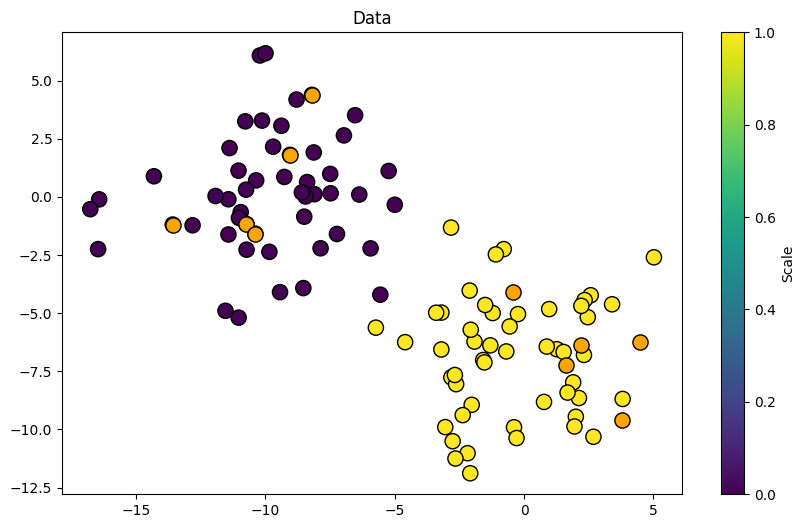

In [3]:
# Create a scatter plot for training data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(training_data[:,0], training_data[:,1], c=labels, cmap='viridis', edgecolor='k', s=120)
plt.colorbar(scatter, label='Scale')

# Create a scatter plot for test data
plt.scatter(test_data[:,0], test_data[:,1], color='orange', edgecolor='k', s=120)

plt.title('Data')
plt.show()

In [4]:
# Conversion to a DataFrame

df = pd.DataFrame({"Train X": training_data[:,0],"Train Y":training_data[:,1], "Class": labels})
dft = pd.DataFrame({"Test X": test_data[:,0], "Test Y" : test_data[:,1], "Class": labels_test})

print("\n", df , "\n\n", dft ,"\n")



       Train X    Train Y  Class
0  -10.781223   3.248461      0
1    2.003668  -9.453210      1
2   -4.598112  -6.247412      1
3    2.683953 -10.315294      1
4   -8.798945   4.186751      0
..        ...        ...    ...
95   3.813861  -8.689160      1
96  -7.497152   0.988766      0
97  -9.998986   6.175448      0
98  -3.398593  -4.980838      1
99  -5.558422  -4.205846      0

[100 rows x 3 columns] 

       Test X    Test Y  Class
0 -13.585845 -1.189688      0
1   3.772290 -9.575212      1
2  -0.427347 -4.079462      1
3 -10.738421 -1.165347      0
4 -10.394218 -1.582377      0
5   2.210831 -6.372136      1
6  -8.202789  4.387785      0
7   4.472505 -6.246487      1
8  -9.050811  1.806251      0
9   1.603644 -7.243514      1 



# Manual Implementation

In [5]:
def KNeighbors(train, test, l):
    # Initialize lists to store distances, labels, min values, squared distances, and labels of min values.
    d=[];Dl=[];minima=[];D=[];Lminima=[]

    # Loop through every point in the test set
    for i in test:
        # For each test point, loop through every point in the train set
        for j in train:
            # Compute the element-wise difference between the test and train point and append to list d
            d.append([e1 - e2 for e1, e2 in zip(i,j)])
            # Append the label of the train point to Dl
            Dl.append(l[train.index(j)])
        # Compute squared distance for each element-wise difference and store in list D
        D = [w[0]**2 + w[1]**2 for w in d]

    # For each test point, find the minimum squared distance to all train points
    for i in range(len(test)):
        # Get the minimum squared distance and its associated label
        minima.append(min(D[i*len(train):(i+1)*len(train)]))
        Lminima.append(Dl[D.index(minima[i])])

    # Print the minimum distances and their associated labels
    print("Minimum distance: ", minima , "\nClass: ", Lminima)

    return minima, Lminima


# Results


In [6]:
# Data type to a list variable
test = test_data.tolist()
train = training_data.tolist()
lab = labels.tolist()

minima, Lminima = KNeighbors(train, test, lab)

Minimum distance:  [0.0, 0.7868171603594964, 0.9607108763696425, 0.0, 0.0, 0.19039809310518657, 0.0, 3.7887070174687443, 0.0, 0.3358265969339262] 
Class:  [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]


ACCURACY
1.0

Confusion Matrix


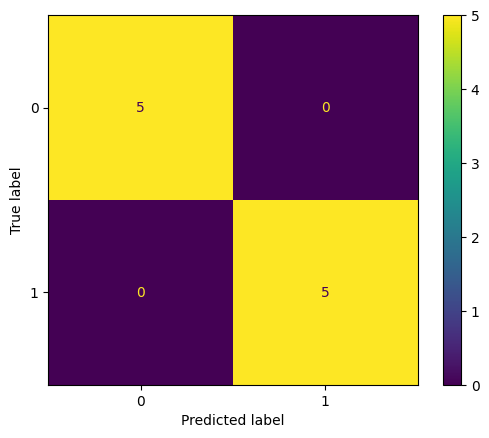

In [7]:
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Confusion matrix
cm = confusion_matrix(labels_test, Lminima)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

# accuracy
acc = accuracy_score(labels_test,Lminima)


# printing results
print("ACCURACY")
print(acc)
print("\nConfusion Matrix")
disp.plot()
plt.show()

# SKLearn Implementation

In [8]:
# Code from: https://plotly.com/python/knn-classification/

from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

X = np.vstack((training_data, test_data))
y = np.append(labels, labels_test )

X_train, y_train = training_data, labels
X_test, y_test = test_data, labels_test

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


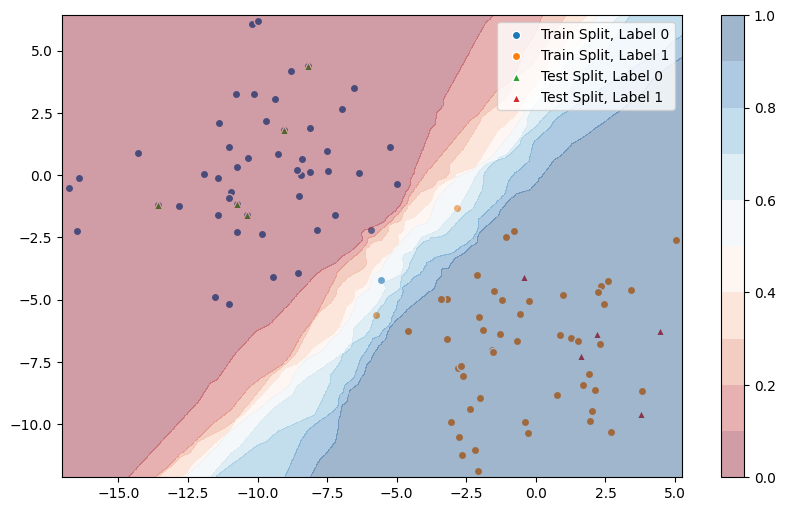

In [9]:

# Define specifications for the traces.
trace_specs = [
    [X_train, y_train, 0, 'Train', 'o'],
    [X_train, y_train, 1, 'Train', 'o'],
    [X_test, y_test, 0, 'Test', '^'],   # Using diamond for a different marker
    [X_test, y_test, 1, 'Test', '^']    # Using triangle for a different marker
]

# Create a scatter plot for each specification in trace_specs
plt.figure(figsize=(10, 6))

for X, y, label, split, marker in trace_specs:
    plt.scatter(X[y == label, 0], X[y == label, 1],
                label=f'{split} Split, Label {label}', marker=marker, edgecolor='white')

# Contour plot
xrange, yrange = np.meshgrid(xrange, yrange)
plt.contourf(xrange, yrange, Z, levels=10, alpha=0.4, cmap='RdBu')
plt.colorbar()

plt.legend()
plt.show()
